In [26]:
import pandas as pd
from tqdm import tqdm
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import unidecode
import string

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
import re

#Barplot of most freq Bi-grams
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer

from scipy.sparse import coo_matrix

#removing html tags and text
from lxml import html

# getting ngrams
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import collections

#nlp
from textblob import TextBlob

#nlp-spacy
import spacy
from spacy import displacy
from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()

import glob
import json
import tqdm

import csv
import requests 
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request

import difflib
# from fuzzywuzzy import fuzz 
# from fuzzywuzzy import process 

#import libraries specific to below code

import re, nltk, spacy


# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/nouf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nouf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("/Users/nouf/Desktop/البروجيكت الرابع/COVID19_df_EN.csv")

In [29]:
df

,body_text,methods,results,title,abstract,authors,language,processed_body_textt
0,"Mortality owing to coronavirus disease , cause...",NaN,"We found 14,753 confirmed and suspected COVID-...",Spatiotemporal ecological study of COVID-19 mo...,"BACKGROUND: Currently, Brazil is experiencing ...","Bermudi, Patricia Marques Moralejo; Lorenz, Ca...",en,mortality owing coronavirus disease caused nov...
1,"Formaldehyde, the simplest aldehyde, is an org...",NaN,To validate all subsequent experiments fumigat...,Comparing the Efficacy of Formaldehyde with Hy...,BACKGROUND: The recent reclassification of for...,"Stuart, Jamie; Chewins, John; Tearle, Jason",en,formaldehyde simplest aldehyde organic compoun...
2,a1111111111 a1111111111 a1111111111 a111111111...,Data on snakebite is primarily collected from ...,NaN,Control of snakebite envenoming: A mathematica...,A mathematical model is designed to assess the...,"Abdullahi, Shuaibu Ahijo; Habib, Abdulrazaq Ga...",en,elucidated snakebite envenoming share epidemio...
3,The rapid and effective dissemination of resea...,NaN,NaN,Dissemination of research during the first yea...,NaN,"Brandt, Justin S; Grover, Sonal; Ananth, Cande V",en,rapid effective dissemination research coronav...
4,with refund cheques issued by the United State...,NaN,NaN,Cognitive Enhancement and Moral Bioenhancement...,This chapter explores technological ways in wh...,"Mercer, Calvin; Trothen, Tracy J.",en,refund cheque issued united state federal trad...
...,...,...,...,...,...,...,...,...
995,The coronavirus epidemic has become humanity's...,Data was compiled from three different publica...,The data was structured and visualized with th...,A Statistical Analysis of Impact of COVID19 on...,The outbreak of pandemic COVID-19 across the w...,"Verma, Parag; Dumka, Ankur; Bhardwaj, Anuj; As...",en,coronavirus epidemic become humanity war centu...
996,"Since the 1980s, rural workers have begun to m...",NaN,NaN,Influence of Subjective/Objective Status and P...,Young migrants have been the major migrant lab...,"Chiang, Yi-Chen; Chu, Meijie; Zhao, Yuchen; Li...",en,rural worker begun migrate city great scale dr...
997,"We are neonatologists, mothers whose own infan...",NaN,NaN,Protecting the infant-parent relationship: spe...,Perinatal mood and anxiety disorders (PMADs) a...,"Johnson Rolfes, Julie; Paulsen, Megan",en,neonatologists mother infant required neonatal...
998,In August 2011 the Wall Street Journal publish...,NaN,NaN,Software-Defined Business: Implications for IT...,NaN,"Alt, Rainer; Leimeister, Jan Marco; Priemuth, ...",en,august wall street journal published essay net...


In [30]:
df.body_text[0]

'Mortality owing to coronavirus disease , caused by the novel severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), is considered avoidable because some collective and individual measures can help prevent the infection, and appropriate health assistance greatly reduces the mortality risk. Nevertheless, mortality risk varies according to some individual and geographic risk factors, resulting in health inequity observed in several parts worldwide since the beginning of the pandemic [1, 2] . In Brazil, COVID-19 was first reported in the city of São Paulo on 25 February 2020 [3] . Until 3 August, 4 months after the first reported death, the disease had already resulted in 2,962,442 confirmed cases and 99,572 deaths in the country [4] . Currently, the United States of America and Brazil are the epicentres of the disease.\nBrazil is the fifth country worldwide in terms of surface area and population and is classified as having an upper-middle-income economy [5] . Almost 60% of the Br

In [74]:
df.authors[2]

'Abdullahi, Shuaibu Ahijo; Habib, Abdulrazaq Garba; Hussaini, Nafiu'

In [31]:
stop_words = set(stopwords.words('english'))


pos_words = ['highest','among','either','seven','six','plus','strongest','worst','greatest','every','better','per','across','throughout','except','fewer','trillion','fewest','latest','least','manifest','unlike','eight','since','toward','largest','despite','via','finest','besides','easiest','must','million','oldest','behind','outside','smaller','nest','longest','whatever','stronger','worse','two','another','billion','best','near','nine','around','nearest','wechat','lowest','smallest','along','higher','three','older','greater','neither','inside','newest','lower','may','although','though','earlier','upon','five','ca','larger','us','whether','beyond','onto','might','one','out','unless','four','whose','can','fastest','without','ecobooth','broadest','easier','within','like', 'could','biggest','bigger','would','thereby','yet','timely','thus','also','avoid','know','usually','time','year','go','welcome','even','date']
extend_words =['used', 'following', 'go', 'instead', 'fundamentally', 'first', 'second', 'alone', 'everything', 'end', 'also', 'year', 'made', 'many', 'towards', 'truly', 'last', 'often', 'called', 'new', 'date', 'fully', 'thus', 'new', 'include', 'http', 'www','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI','-PRON-']

pos_words.extend(extend_words)
pos_words
stop_words = stop_words.union(pos_words)

In [32]:
def text_preprocess(text):
    lemma = nltk.wordnet.WordNetLemmatizer()
    
    #Convert to lower
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Remove accented characters
    text = unidecode.unidecode(text)
    
    #Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in text.split()]
    
    lemmatized = []
    #Lemmatize non-stop words and save
    other_words = ['virus','study','viral','human','infection'] # common words to remove specific to these articles
    for word in text:
        if word not in stop_words:
            x = lemma.lemmatize(word)
            if x not in other_words:
                lemmatized.append(x)
   
    result = " ".join(lemmatized)
    return result

In [33]:
df['processed_text'] = df['body_text'].apply(text_preprocess) 

In [34]:
df['processed_text'] 

0      mortality owing coronavirus disease caused nov...
1      formaldehyde simplest aldehyde organic compoun...
2      elucidated snakebite envenoming share epidemio...
3      rapid effective dissemination research coronav...
4      refund cheque issued united state federal trad...
                             ...                        
995    coronavirus epidemic become humanity war centu...
996    rural worker begun migrate city great scale dr...
997    neonatologists mother infant required neonatal...
998    august wall street journal published essay net...
999    ynaptic transmission fundamental process under...
Name: processed_text, Length: 1000, dtype: object

In [35]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    tokens = word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [36]:
df['processed_text_T'] = df['processed_text'].apply(identify_tokens) 

In [37]:
df['processed_text_T']

0      [mortality, owing, coronavirus, disease, cause...
1      [formaldehyde, simplest, aldehyde, organic, co...
2      [elucidated, snakebite, envenoming, share, epi...
3      [rapid, effective, dissemination, research, co...
4      [refund, cheque, issued, united, state, federa...
                             ...                        
995    [coronavirus, epidemic, become, humanity, war,...
996    [rural, worker, begun, migrate, city, great, s...
997    [neonatologists, mother, infant, required, neo...
998    [august, wall, street, journal, published, ess...
999    [ynaptic, transmission, fundamental, process, ...
Name: processed_text_T, Length: 1000, dtype: object

In [68]:
df['processed_text']

0      mortality owing coronavirus disease caused nov...
1      formaldehyde simplest aldehyde organic compoun...
2      elucidated snakebite envenoming share epidemio...
3      rapid effective dissemination research coronav...
4      refund cheque issued united state federal trad...
                             ...                        
995    coronavirus epidemic become humanity war centu...
996    rural worker begun migrate city great scale dr...
997    neonatologists mother infant required neonatal...
998    august wall street journal published essay net...
999    ynaptic transmission fundamental process under...
Name: processed_text, Length: 1000, dtype: object

In [69]:
import pandas as pd
corpus = df['processed_text']

# original Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
pd.DataFrame(X, columns=cv.get_feature_names())

,0c,12,14,38,aa,aaa,aaaca,aaalac,aaatcgggtgacagaagac,aaatttcttcctagcagctc,...,zycov,zyda,zydney,zydus,zygomycosis,zygote,zymo,zymogen,zz,zzy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
import pandas as pd
corpus = df['processed_text']

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(min_df = 5)
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

,12,14,aa,aaa,aac,aat,ab,abandoned,abbott,abbreviated,...,zn,zo,zone,zoo,zoom,zoonosis,zoonotic,zoster,zou,zu
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.009912,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.020351,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.024912,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.013012,0.0,0.0,0.018162
3,0.0,0.000000,0.260491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
998,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [52]:
word_list=[]
    #loop over all thetext
for tw_words in df['processed_text_T']:
        word_list.extend(tw_words)
word_freq=pd.Series(word_list).value_counts()
    #print top 25 Words
ww=word_freq[:100]

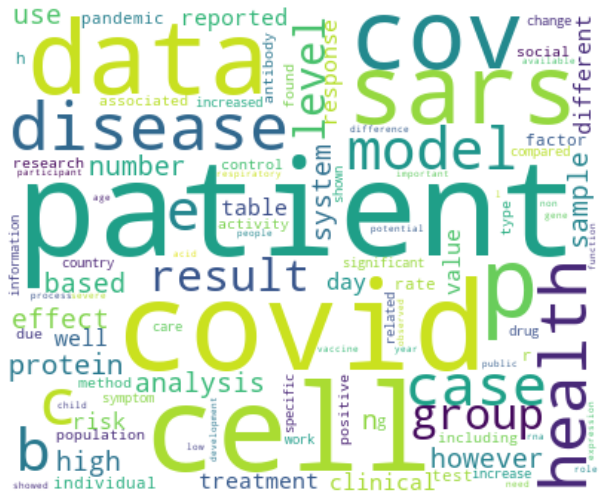

In [53]:
#generate word cloud
wc=WordCloud(width=400,height=330,background_color="white").generate_from_frequencies(ww)
plt.figure(figsize=(13,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()